In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import re


In [12]:
def load_train_data(sub, video, scenario):
    # create file name based on parameters
    file_name = f"sub_{sub}_vid_{video}.csv"

    # load data files
    train_physiology = pd.read_csv(Path(f"../data/raw/scenario_{scenario}/train/physiology", file_name), index_col="time")
    train_annotations = pd.read_csv(Path(f"../data/raw/scenario_{scenario}/train/annotations", file_name), index_col="time")

    return train_physiology, train_annotations

sub = 4
video = 1
scenario = 1

train_physiology, train_annotations = load_train_data(sub, video, scenario)

print(train_physiology.head())
print(train_annotations.head())


        ecg     bvp     gsr     rsp     skt  emg_zygo  emg_coru  emg_trap
time                                                                     
0     0.846  36.409  16.026  42.197  28.541     4.496     5.072     6.138
1     0.859  35.182  16.003  42.226  28.558     4.536     5.193     6.098
2     0.856  35.371  16.027  42.226  28.559     4.618     5.275     6.178
3     0.862  35.584  16.011  42.217  28.559     4.578     5.154     6.139
4     0.872  35.768  16.058  42.207  28.565     4.578     5.234     6.179
      valence  arousal
time                  
0         5.0      5.0
50        5.0      5.0
100       5.0      5.0
150       5.0      5.0
200       5.0      5.0


In [15]:
# Data overview
print(train_physiology.head())
print(train_physiology.shape)
print(train_physiology.dtypes)


        ecg     bvp     gsr     rsp     skt  emg_zygo  emg_coru  emg_trap
time                                                                     
0     0.846  36.409  16.026  42.197  28.541     4.496     5.072     6.138
1     0.859  35.182  16.003  42.226  28.558     4.536     5.193     6.098
2     0.856  35.371  16.027  42.226  28.559     4.618     5.275     6.178
3     0.862  35.584  16.011  42.217  28.559     4.578     5.154     6.139
4     0.872  35.768  16.058  42.207  28.565     4.578     5.234     6.179
(103001, 8)
ecg         float64
bvp         float64
gsr         float64
rsp         float64
skt         float64
emg_zygo    float64
emg_coru    float64
emg_trap    float64
dtype: object


In [16]:
print(train_physiology.describe())
print(train_physiology.isnull().sum())

                 ecg            bvp            gsr            rsp   
count  103001.000000  103001.000000  103001.000000  103001.000000  \
mean        0.830233      36.175913      16.079553      42.899472   
std         0.253573       1.626437       0.206599       0.482330   
min        -0.632000      32.357000      13.334000      40.745000   
25%         0.757000      34.913000      15.885000      42.623000   
50%         0.803000      36.060000      16.078000      42.865000   
75%         0.935000      37.199000      16.252000      43.213000   
max         1.372000      41.154000      16.620000      44.229000   

                 skt       emg_zygo       emg_coru       emg_trap  
count  103001.000000  103001.000000  103001.000000  103001.000000  
mean       28.536334       4.741702       6.561100       6.780106  
std         0.010788       0.454529       0.877712       1.370981  
min        28.503000       4.333000       4.950000       5.648000  
25%        28.527000       4.577000   

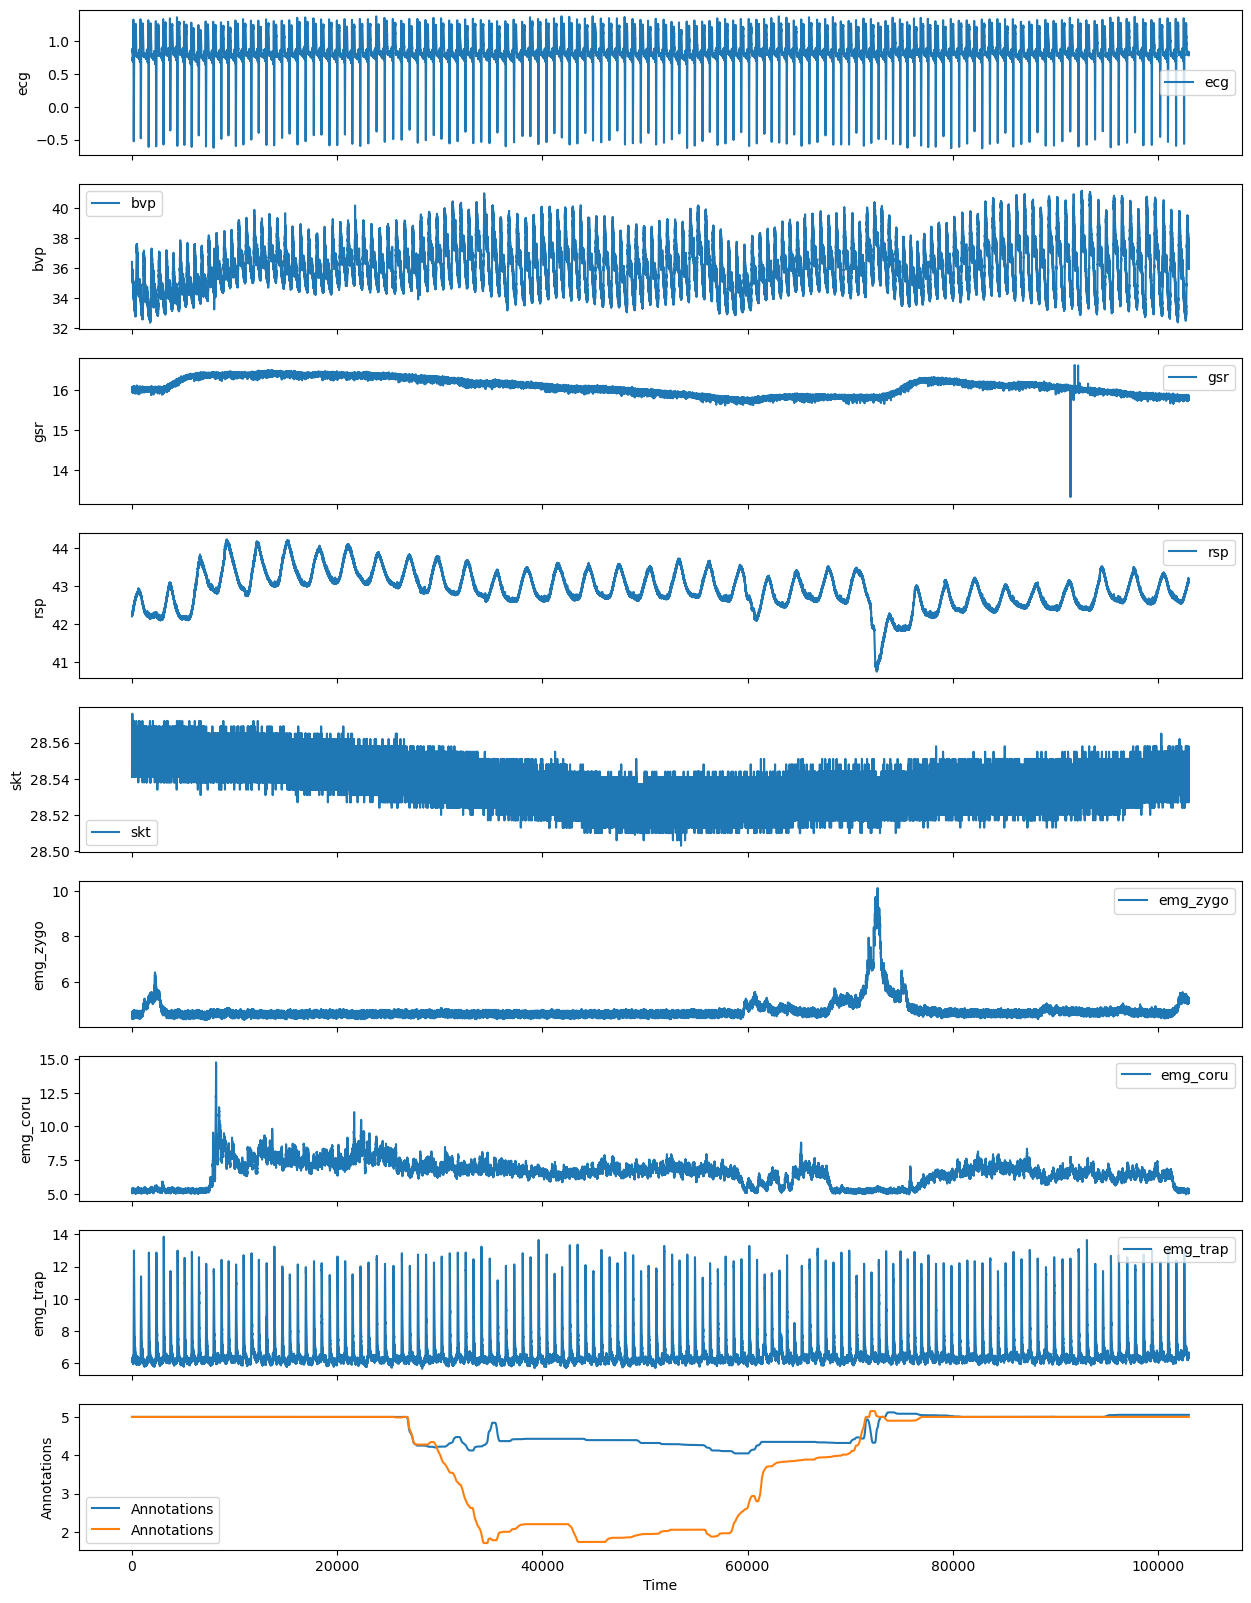

In [13]:
# Create a new figure
fig, ax = plt.subplots(9, 1, figsize=(15, 20), sharex=True)

# Plot all 8 physiological signals
for idx, signal in enumerate(train_physiology.columns):
    ax[idx].plot(train_physiology[signal], label=signal)
    ax[idx].set_ylabel(signal)
    ax[idx].legend()

# Plot the annotations timeseries
ax[8].plot(train_annotations, label="Annotations")
ax[8].set_ylabel("Annotations")
ax[8].legend()

# Set the xlabel for the last subplot
ax[8].set_xlabel("Time")

# Show the plot
plt.show()

In [28]:
import matplotlib.pyplot as plt

from pathlib import Path

results_dir = Path("../results/exploratory")
if not results_dir.exists():
    results_dir.mkdir(parents=True)


def plot_and_save(sub, video, scenario):
    # Load data
    file_name = f"sub_{sub}_vid_{video}.csv"
    train_physiology = pd.read_csv(Path(f"../data/raw/scenario_{scenario}/train/physiology", file_name), index_col="time")
    train_annotations = pd.read_csv(Path(f"../data/raw/scenario_{scenario}/train/annotations", file_name), index_col="time")

    # Create a new figure
    fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(15, 20), sharex=True)
    
    # Plot physiology signals
    for i, signal in enumerate(train_physiology.columns):
        ax[i].plot(train_physiology.index, train_physiology[signal], label=signal)
        ax[i].set_title(signal)
        ax[i].legend(loc='upper right')

    # Plot annotations
    ax[8].plot(train_annotations.index, train_annotations["arousal"], label="arousal", color="r")
    ax[8].plot(train_annotations.index, train_annotations["valence"], label="valence", color="b")
    ax[8].set_title("Annotations - Arousal and Valence")
    ax[8].legend(loc='upper right')

    # Set main title
    fig.suptitle(f"Participant {sub}, Video {video}, Scenario {scenario}")

    # Save the plot as a .png file
    fig.savefig(Path(f"../results/exploratory/sub_{sub}_vid_{video}_scenario_{scenario}.png"))
    plt.close(fig)


In [29]:
# Settings
scenario = 1
counter = 0
#max_files = 3

# Iterate over subjects and videos
physiology_dir = Path(f"../data/raw/scenario_{scenario}/train/physiology")
pattern = re.compile(r"sub_(\d+)_vid_(\d+)\.csv")

for file in physiology_dir.iterdir():
    match = pattern.match(file.name)
    if match:
        sub = int(match.group(1))
        video = int(match.group(2))
        plot_and_save(sub, video, scenario)
        counter += 1
#        if counter >= max_files:
#            break

In [ ]:
# Univariate analysis
def plot_histograms(data, columns):
    for column in columns:
        plt.figure()
        plt.hist(data[column].dropna(), bins=50)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.savefig(f'histogram_{column}.png')

plot_histograms(data, data.columns)

In [ ]:
# Bivariate analysis
def plot_scatter_matrix(data, columns):
    sns.pairplot(data[columns].dropna())
    plt.savefig('scatter_matrix.png')

plot_scatter_matrix(data, data.columns)

In [ ]:
# Time series analysis (if applicable)
def plot_time_series(data, time_column, columns):
    for column in columns:
        plt.figure()
        plt.plot(data[time_column], data[column])
        plt.title(f'Time series of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.savefig(f'time_series_{column}.png')

In [ ]:
plot_time_series(data, 'time_column', data.columns)
